In [1]:
import MySQLdb as db

In [2]:
fruitDB = db.connect(host = '140.113.203.226', user = 'andersen', passwd = 'nol56680', \
                     db = 'andersen', port = 3306, charset = 'utf8')
#set charset to utf8

In [3]:
#LA1 甘藍 初秋 => 高麗菜
#2012-06-09 ~
query = "SELECT Taichung_Weather.Date, Taichung_Fruit.Item,`SeaPres`,`StnPres`,`StnPresMax`,\
    `StnPresMin`,`Temperature`,`T_Max`,`T_Min`,`Td_dew_point`,`RH`, RHMin,`WS`,`WD`, `WSGust`,\
    `WDGust`,`Precp`,`PrecpHour`,`PrecpMax10`,`PrecpHrMax`,`SunShine`,`SunShineRate`, `GloblRad`,\
    `VisbMean`,`EvapA`, Taichung_Fruit.Price \
    FROM `Taichung_Weather`, Taichung_Fruit \
    WHERE Taichung_Fruit.Date = Taichung_Weather.Date AND Taichung_Fruit.Item = 'LA1 甘藍 初秋'AND\
    Taichung_Fruit.Date >= '2012-06-09'"

c = fruitDB.cursor()

In [4]:
c.execute(query)
result = c.fetchall()
data1 = []
for row in result:
    new = [row[0], row[1], float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]),\
          float(row[7]), float(row[8]), float(row[9]), int(row[10]), int(row[11]), float(row[12]), \
           int(row[13]), float(row[14]), int(row[15]), float(row[16]), float(row[17]), float(row[18]),\
          float(row[19]), float(row[20]), float(row[21]) ,float(row[22]), float(row[23]), \
           float(row[24]), float(row[25])]
    data1.append(new)

In [5]:
import pandas as pd
import numpy as np
data1 = np.array(data1)
columns = ['date', 'item', 'seaPres', 'stnPres', 'stnPresMax', 'stnPresMin', 'T', 'T-Max', 'T-min', \
          'Td_dew_point', 'rh', 'rhMin', 'WS', 'WD', 'wsGust', 'wdGust', 'precp', 'precpHr', \
          'precpMax10', 'precpHrMax', 'sunshine', 'sunshineRate', 'globRad', 'visbMean', 'evapA', \
          'price']
data1 = pd.DataFrame(data = data1[0:, 0:], columns = columns)

In [6]:
trcol = columns[2:25]
target = "price"

In [7]:
data3 = []
for date in data1['date']:
    query = "SELECT `SeaPres`,`StnPres`,`StnPresMax`,`StnPresMin`,`Temperature`,`T_Max`,`T_Min`,`Td_dew_point`,`RH`, RHMin,\
            `WS`,`WD`, `WSGust`, `WDGust`,`Precp`,`PrecpHour`,`PrecpMax10`,`PrecpHrMax`,`SunShine`,`SunShineRate`, `GloblRad`,\
            `VisbMean`,`EvapA` \
            FROM Taichung_Weather \
            WHERE Date < '%s' ORDER BY Taichung_Weather.Date DESC LIMIT 3 " %date
    #print date
    c = fruitDB.cursor()
    c.execute(query)
    new = [0]*len(trcol)
    result = c.fetchall()
    for row in result:
        for i in range(0, len(trcol)):
            new[i] += row[i]
    for i in range(0, len(trcol)):
        new[i] = new[i]/ c.rowcount
    data3.append(new)

In [8]:
col3 = ['seaPres3', 'stnPres3', 'stnPresMax3', 'stnPresMin3', 'T3', 'T-Max3', 'T-min3', \
          'Td_dew_point3', 'rh3', 'rhMin3', 'WS3', 'WD3', 'wsGust3', 'wdGust3', 'precp3', 'precpHr3', \
          '3precpMax10', 'precpHrMax3', 'sunshine3', 'sunshineRate3', 'globRad3', 'visbMean3', 'evapA3']
data3 = pd.DataFrame(data = np.array(data3), columns = col3)
data3 = data3.round(decimals = 2)
data3.head()

,seaPres3,stnPres3,stnPresMax3,stnPresMin3,T3,T-Max3,T-min3,Td_dew_point3,rh3,rhMin3,...,wdGust3,precp3,precpHr3,3precpMax10,precpHrMax3,sunshine3,sunshineRate3,globRad3,visbMean3,evapA3
0,1004.97,995.37,996.87,993.77,29.40,33.47,26.37,23.97,73.0,59.0,...,266.67,2.77,0.33,2.20,2.50,5.77,42.60,19.81,11.43,-0.87
1,1005.27,995.63,997.20,993.93,29.07,33.30,26.37,24.17,75.0,61.0,...,246.67,9.67,2.23,5.53,7.10,4.73,34.97,17.58,11.93,-0.43
2,1002.33,992.67,994.30,990.97,27.57,30.73,25.57,24.67,84.0,71.0,...,243.33,27.53,7.63,6.83,10.73,1.00,7.40,8.83,8.97,-2.80
3,1000.33,990.70,992.63,989.00,27.13,29.60,25.40,24.93,88.0,76.0,...,223.33,44.00,9.23,6.57,12.20,0.23,1.73,5.81,8.63,-2.77
4,1000.27,990.63,992.53,989.17,27.13,29.67,25.23,24.70,87.0,74.0,...,196.67,36.57,6.20,5.30,9.63,0.37,2.70,7.45,8.70,-2.80


In [9]:
data7 = []
for date in data1['date']:
    query = "SELECT `SeaPres`,`StnPres`,`StnPresMax`,`StnPresMin`,`Temperature`,`T_Max`,`T_Min`,`Td_dew_point`,`RH`, RHMin,\
            `WS`,`WD`, `WSGust`, `WDGust`,`Precp`,`PrecpHour`,`PrecpMax10`,`PrecpHrMax`,`SunShine`,`SunShineRate`, `GloblRad`,\
            `VisbMean`,`EvapA` \
            FROM Taichung_Weather \
            WHERE Date < '%s' ORDER BY Taichung_Weather.Date DESC LIMIT 7 " %date
    #print date
    c = fruitDB.cursor()
    c.execute(query)
    new = [0]*len(trcol)
    result = c.fetchall()
    for row in result:
        for i in range(0, len(trcol)):
            new[i] += row[i]
    for i in range(0, len(trcol)):
        new[i] = new[i]/ c.rowcount
    data7.append(new)
fruitDB.close()

In [10]:
col7 = ['seaPres7', 'stnPres7', 'stnPresMax7', 'stnPresMin7', 'T7', 'T-Max7', 'T-min7', \
          'Td_dew_point7', 'rh7', 'rhMin7', 'WS7', 'WD7', 'wsGust7', 'wdGust7', 'precp7', 'precpHr7', \
          '7precpMax10', 'precpHrMax7', 'sunshine7', 'sunshineRate7', 'globRad7', 'visbMean7', 'evapA7']
data7 = pd.DataFrame(data = np.array(data7), columns = col7)
data7 = data7.round(decimals = 2)
data7.head()

,seaPres7,stnPres7,stnPresMax7,stnPresMin7,T7,T-Max7,T-min7,Td_dew_point7,rh7,rhMin7,...,wdGust7,precp7,precpHr7,7precpMax10,precpHrMax7,sunshine7,sunshineRate7,globRad7,visbMean7,evapA7
0,1004.07,994.43,995.90,992.79,28.34,32.37,25.70,22.99,73.0,59.0,...,301.43,1.19,0.14,0.94,1.07,7.03,51.99,21.14,11.64,2.16
1,1004.10,994.46,995.91,992.83,28.44,32.53,25.77,23.33,74.0,60.0,...,287.14,4.14,0.96,2.37,3.04,5.76,42.56,19.15,11.13,1.17
2,1003.63,994.00,995.49,992.41,28.46,32.27,25.84,24.11,78.0,63.0,...,261.43,12.99,3.41,3.87,5.67,4.56,33.69,16.25,10.39,-0.89
3,1002.99,993.36,995.09,991.70,28.20,31.60,25.81,24.40,80.0,67.0,...,245.71,23.00,4.91,5.19,8.27,2.90,21.43,12.88,10.07,-1.91
4,1002.64,993.00,994.73,991.36,27.96,31.36,25.69,24.46,82.0,68.0,...,224.29,23.13,5.04,5.29,8.37,2.29,16.89,11.95,10.10,-1.83


In [11]:
#training data
#X
Xtrain = data1.join(data3).join(data7)[trcol+col3+col7].apply(pd.to_numeric).iloc[0:1300]
#y
ytrain = data1[target].apply(pd.to_numeric).iloc[:1300]

In [12]:
#testing data
#X
Xtest = data1.join(data3).join(data7)[trcol+col3+col7].apply(pd.to_numeric).iloc[1300:]
#y
ytest = data1[target].apply(pd.to_numeric).iloc[1300:]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_norm = pd.DataFrame(data = scaler.fit_transform(Xtrain), columns = trcol+col3+col7)
Xtest_norm = pd.DataFrame(data = scaler.fit_transform(Xtest), columns = trcol+col3+col7)

In [ ]:
#using SVD to apply dimension reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 10)
Xtrain_svd = svd.fit_transform(Xtrain)
Xtest_svd = svd.fit_transform(Xtest)

In [ ]:
#將training column的data最後一行刪掉
Xtr.drop(Xtr.index[len(Xtr) - 1])
#將target的首行刪除
ytr.drop(ytr.index[0])
Xt.drop(Xt.index[len(Xt)- 1])
yt.drop(yt.index[0])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
Lreg = LinearRegression(n_jobs=-1)

In [17]:
Lreg.fit(Xtrain_norm, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

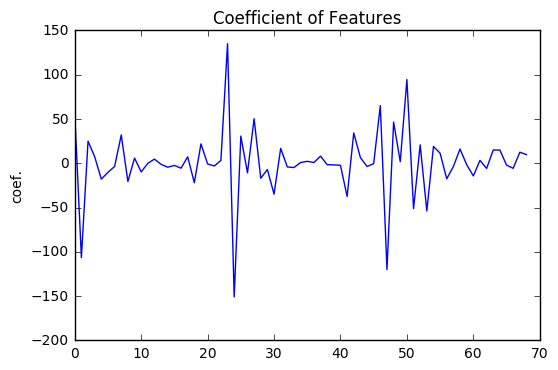

In [18]:
plt.plot(Lreg.coef_)
plt.title('Coefficient of Features')
plt.ylabel('coef.')
plt.show()

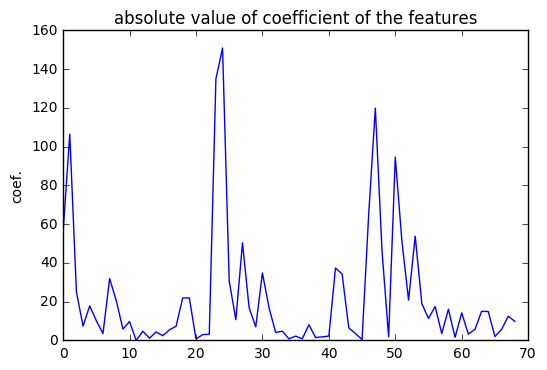

In [19]:
plt.plot(np.absolute(Lreg.coef_))
plt.title('absolute value of coefficient of the features')
plt.ylabel('coef.')
plt.show()

In [20]:
featCoef = np.absolute(Lreg.coef_)
acol = trcol+col3+col7
maxidx = []
for i in range(0, 10):
    maxidx.append(np.argmax(featCoef))
    featCoef[maxidx[i]] = -1
    print acol[maxidx[i]]

stnPres3
seaPres3
stnPres7
stnPres
T7
seaPres7
seaPres
Td_dew_point7
T-Max7
T3


In [21]:
feat = []
for i in maxidx:
    feat.append(acol[i])
print feat

['stnPres3', 'seaPres3', 'stnPres7', 'stnPres', 'T7', 'seaPres7', 'seaPres', 'Td_dew_point7', 'T-Max7', 'T3']


In [22]:
Lreg.fit(Xtrain_norm[feat], ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [23]:
#dose not fit at all?
Lreg.score(Xtest_norm[feat], ytest)

-0.46814732290326222

In [24]:
yLinear = pd.DataFrame(data = np.round(Lreg.predict(Xtest_norm[feat]), decimals = 1))
np.round(Lreg.predict(Xtest_norm[feat]), decimals = 2)

array([ 26.61,  26.51,  25.1 ,  26.61,  26.19,  27.52,  28.01,  26.86,
        25.59,  24.18,  23.56,  23.54,  23.36,  25.08,  27.44,  27.  ,
        26.53,  26.08,  23.99,  22.21,  21.29,  20.84,  20.26,  19.63,
        17.11,  19.53,  20.76,  19.43,  18.72,  17.19,  14.37,  13.55,
        18.6 ,  19.36,  19.98,  17.16,  15.89,  15.42,  13.72,  15.24,
        13.35,  17.89,  19.58,  20.74,  23.66,  22.37,  21.31,  20.32,
        19.78,  19.49,  18.87,  18.87,  17.4 ,  13.57,  15.57,  18.84,
        18.84,  19.24,  16.95,  18.36,  12.39,   9.38,   9.53,  15.37,
        14.98,  11.77,  11.79,  10.75,   7.31,   5.22,   6.7 ])

In [25]:
np.array(ytest)

array([ 36. ,  25.2,  23.9,  35. ,  35.8,  27.3,  26.5,  32.5,  28.6,
        28.8,  31.2,  30.3,  31.4,  32.8,  34.2,  32.8,  35. ,  30. ,
        27.8,  26.7,  30.6,  22. ,  35.1,  30.1,  37.5,  54.2,  38.6,
        32.8,  56. ,  51.5,  48.1,  56.3,  47.1,  49.3,  45.3,  42.3,
        50.1,  57.6,  41.7,  49.5,  44.1,  46.1,  42. ,  47.5,  43.3,
        38.3,  24.6,  32.8,  23.6,  25.2,  21.9,  25.8,  22.3,  19.1,
        18.4,  14.6,  11.8,   9.6,   9. ,   8. ,  10. ,  11.5,  10.4,
         8.5,  10.3,   7.9,   8.7,   9.5,   9.2,   7.7,   6.2])

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
RFreg = RandomForestRegressor()

In [28]:
RFreg.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

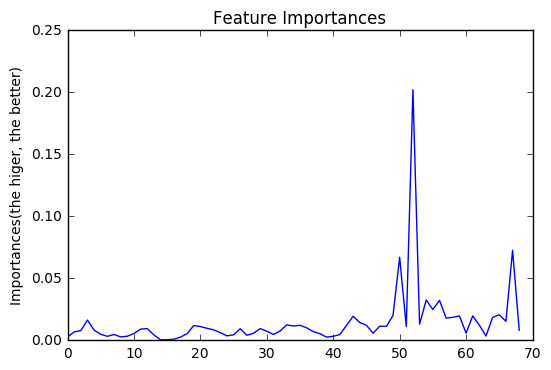

In [29]:
plt.plot(RFreg.feature_importances_)
plt.title('Feature Importances')
plt.ylabel('Importances(the higer, the better)')
plt.show()

In [30]:
RFimp = RFreg.feature_importances_
#print RFimp
RFidx = []
for i in range(0, 10):
    RFidx.append(np.argmax(RFimp))
    RFimp[RFidx[i]] = -1

In [31]:
RFfeat = []
for i in RFidx:
    RFfeat.append(acol[i])
print RFfeat

['T-min7', 'visbMean7', 'T7', 'rh7', 'WS7', 'rhMin7', 'sunshineRate7', 'stnPresMin7', 'wdGust7', 'precpHr7']


In [32]:
RFreg.fit(Xtrain[RFfeat], ytrain)
RFreg.score(Xtest[RFfeat], ytest)

-0.58068426594565703

In [33]:
yRF = pd.DataFrame(data = np.round(RFreg.predict(Xtest[RFfeat]), decimals = 2))
RFreg.predict(Xtest[RFfeat])

array([ 23.56,  20.72,  22.64,  18.31,  17.44,  17.61,  11.35,  14.41,
        14.01,  16.21,  17.43,  18.07,  27.49,  26.91,  23.75,  24.07,
        24.77,  21.27,  17.19,  21.2 ,  21.99,  25.52,  31.98,  29.74,
        18.45,  21.41,  23.32,  24.37,  22.21,  18.75,  18.59,  20.64,
        21.96,  22.95,  20.93,  13.09,  12.34,  21.58,  19.22,  22.13,
        22.17,  21.86,  15.96,  16.65,  13.89,  16.02,  13.53,  13.39,
        13.12,  15.18,  13.8 ,  12.14,   9.53,  12.09,  10.4 ,  11.92,
         8.03,  15.22,  11.8 ,  22.31,  26.55,  26.13,  23.52,  20.18,
        20.08,  19.13,  19.04,  18.28,  17.63,  16.87,  17.05])

In [34]:
np.array(ytest)

array([ 36. ,  25.2,  23.9,  35. ,  35.8,  27.3,  26.5,  32.5,  28.6,
        28.8,  31.2,  30.3,  31.4,  32.8,  34.2,  32.8,  35. ,  30. ,
        27.8,  26.7,  30.6,  22. ,  35.1,  30.1,  37.5,  54.2,  38.6,
        32.8,  56. ,  51.5,  48.1,  56.3,  47.1,  49.3,  45.3,  42.3,
        50.1,  57.6,  41.7,  49.5,  44.1,  46.1,  42. ,  47.5,  43.3,
        38.3,  24.6,  32.8,  23.6,  25.2,  21.9,  25.8,  22.3,  19.1,
        18.4,  14.6,  11.8,   9.6,   9. ,   8. ,  10. ,  11.5,  10.4,
         8.5,  10.3,   7.9,   8.7,   9.5,   9.2,   7.7,   6.2])

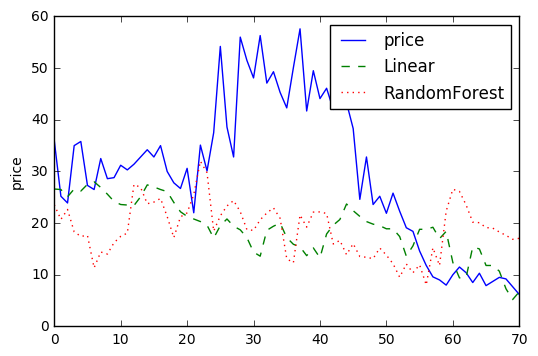

In [35]:
plt.plot(ytest.reset_index()[target], 'b-', label = target)
plt.plot(yLinear, 'g--', label = 'Linear')
plt.plot(yRF, 'r:', label = 'RandomForest')
plt.legend()
plt.ylabel(target)
plt.show()

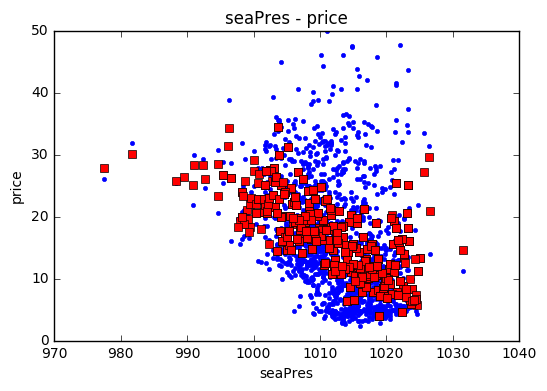

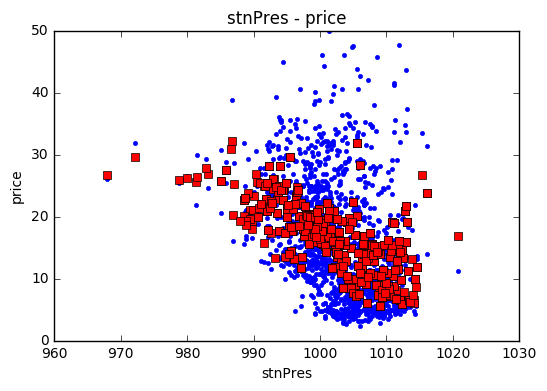

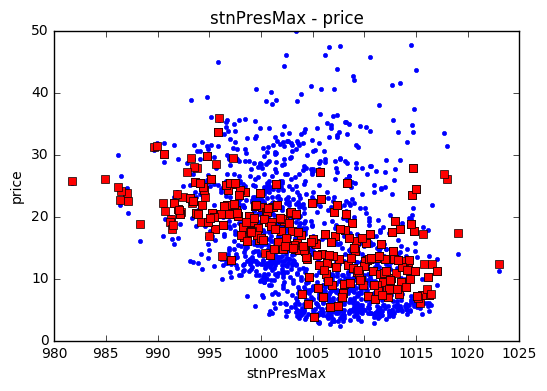

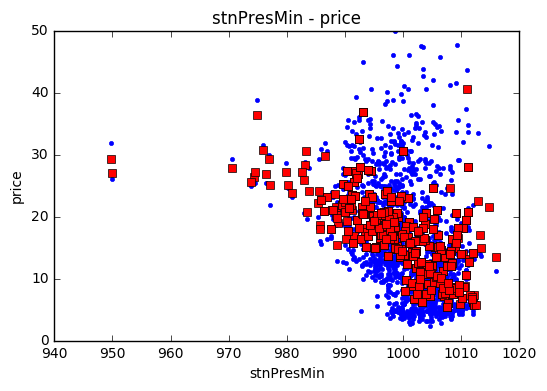

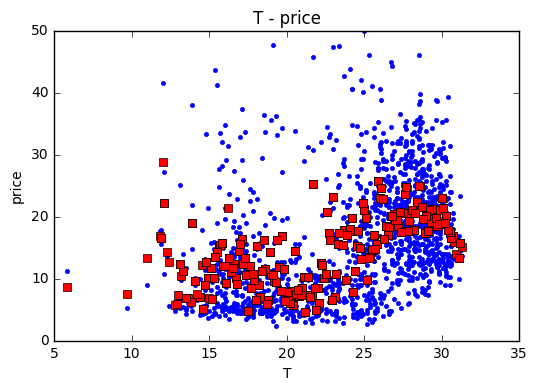

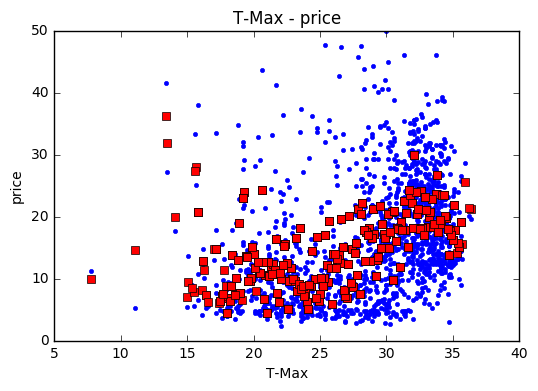

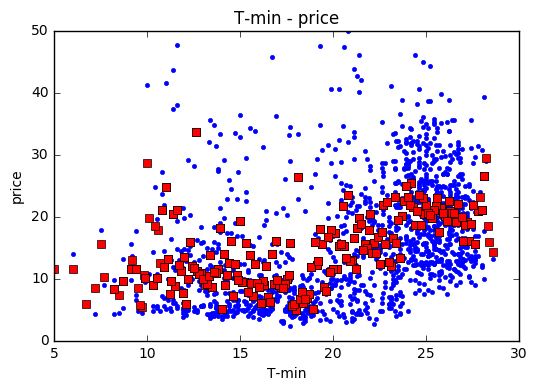

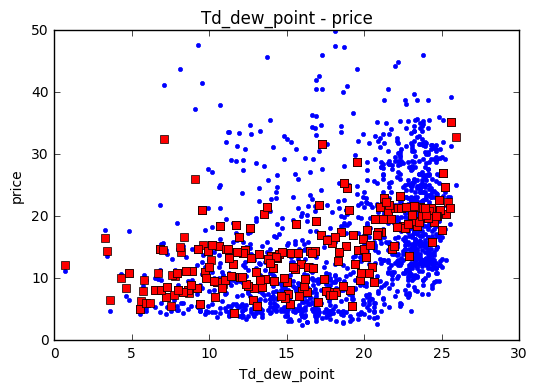

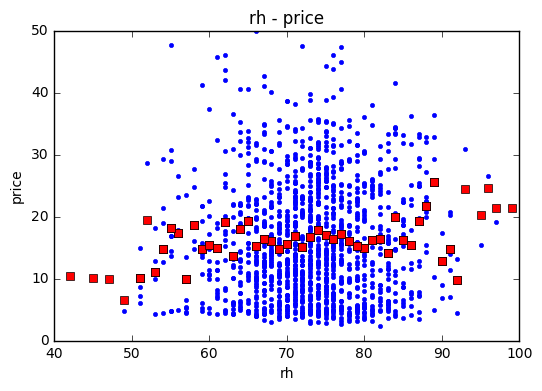

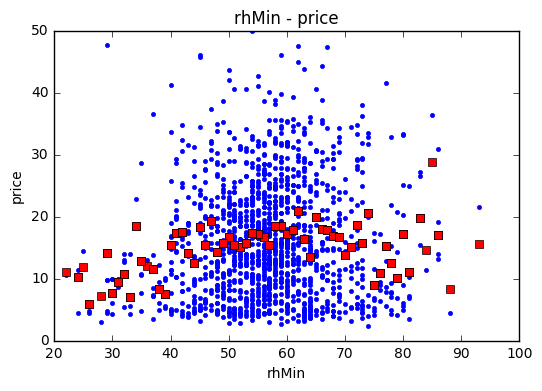

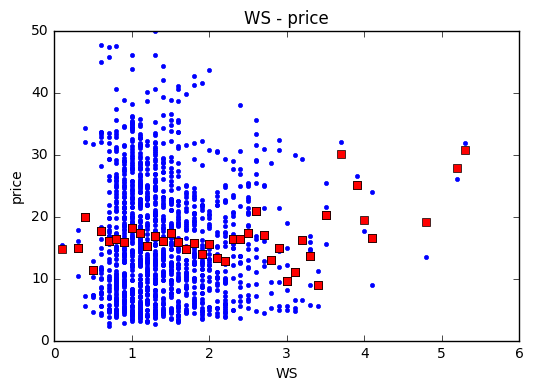

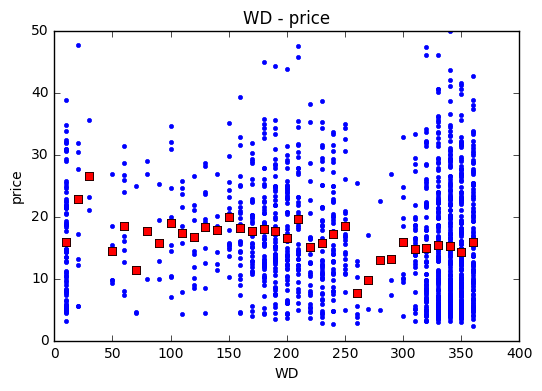

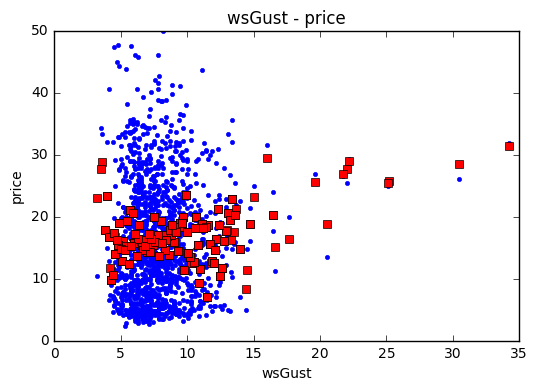

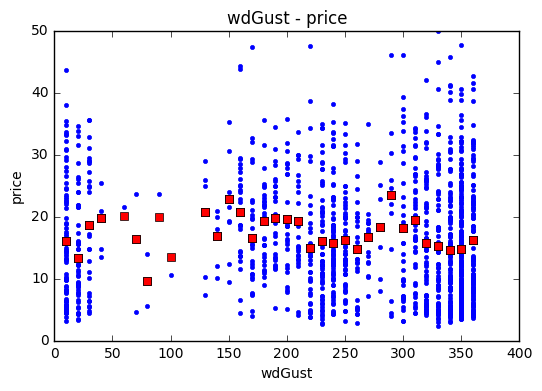

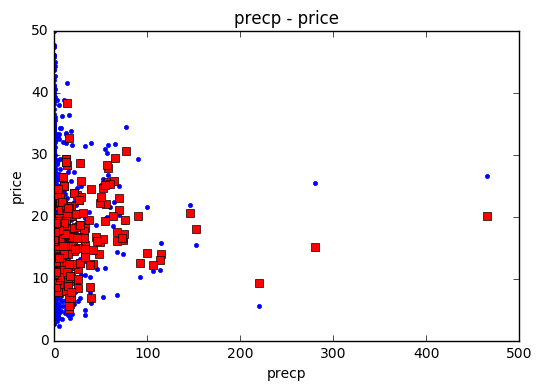

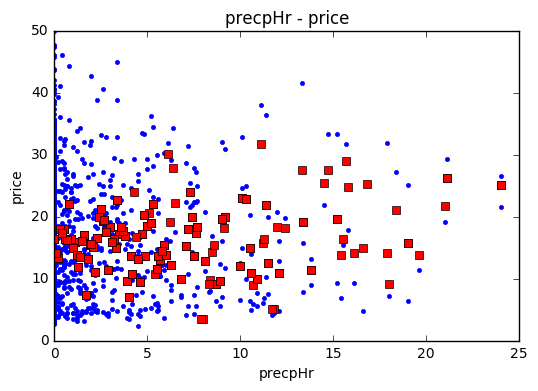

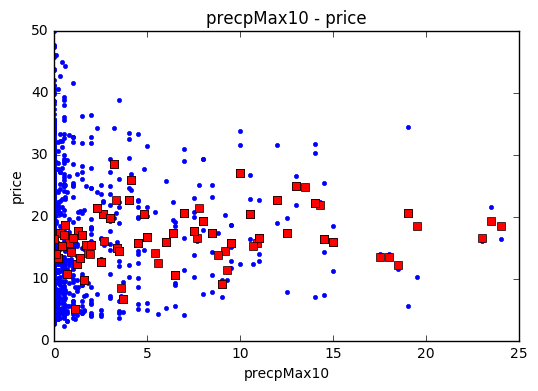

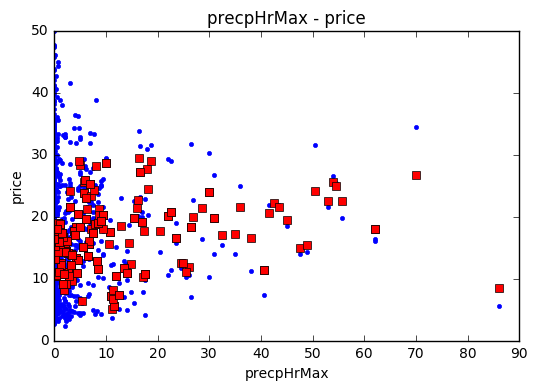

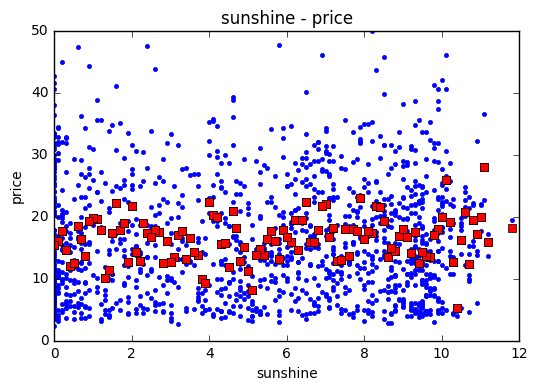

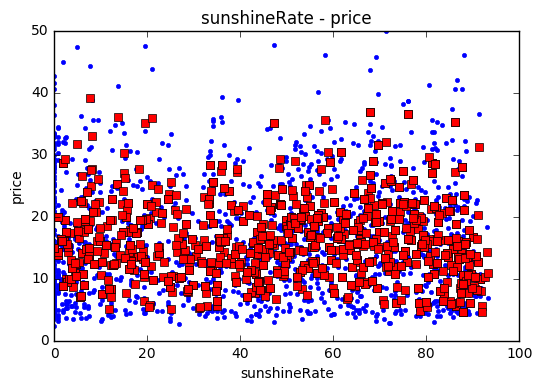

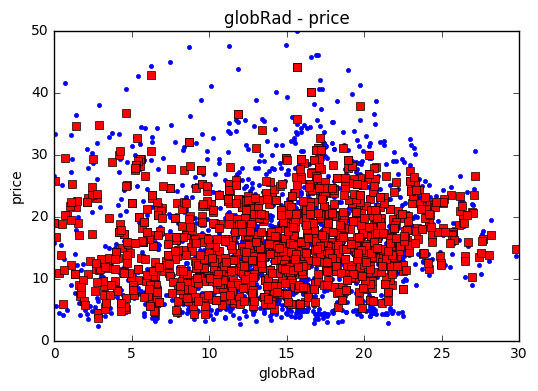

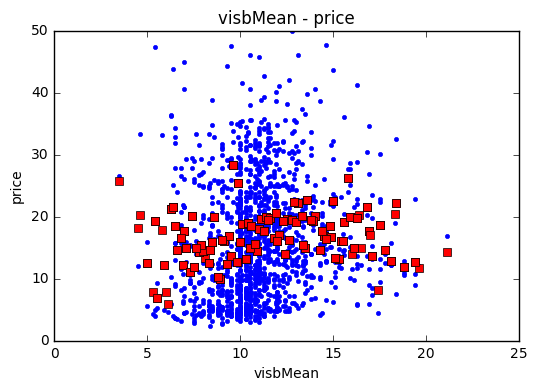

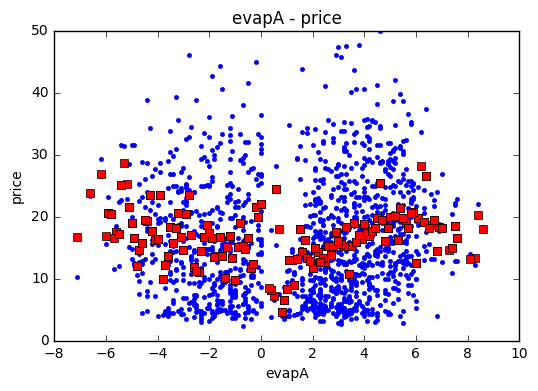

In [56]:
for name in trcol:
    RFreg.fit(Xtrain[name].reshape(-1, 1), ytrain)

    plt.plot(Xtrain[name], ytrain, 'b.')
    plt.plot(Xtrain[name], RFreg.predict(Xtrain[name].reshape(-1, 1)), 'rs')
    plt.title(name + ' - ' + target)
    plt.xlabel(name)
    plt.ylabel(target)
    plt.show()

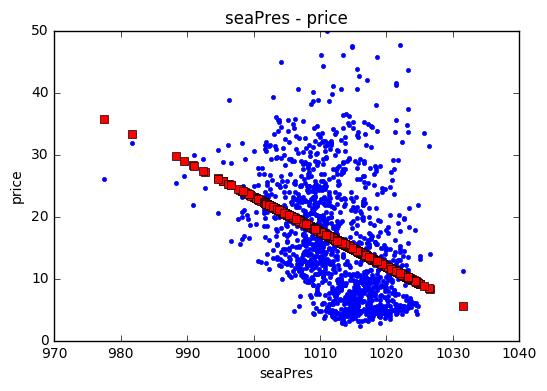

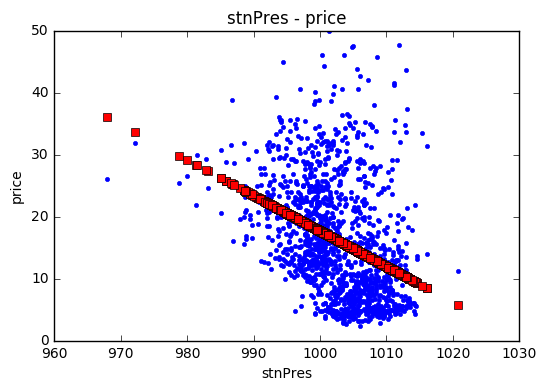

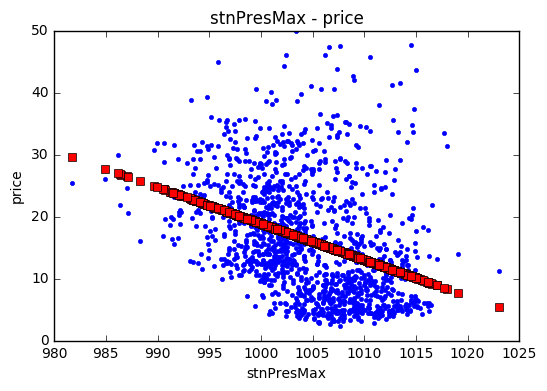

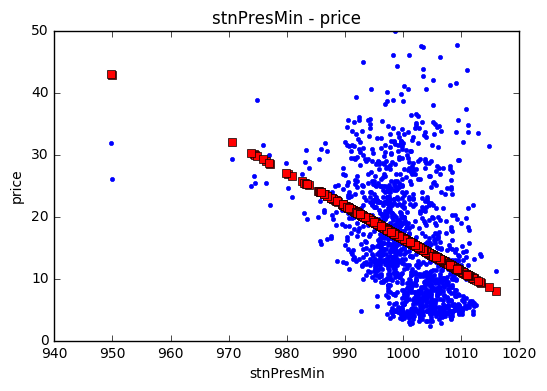

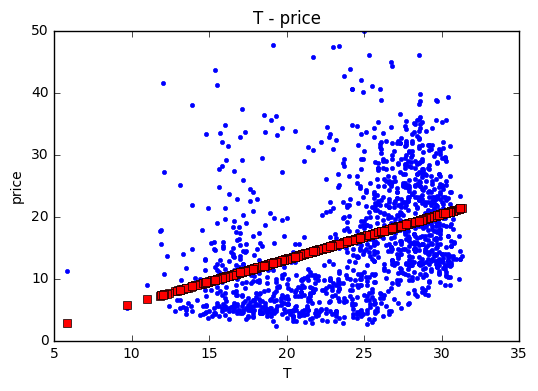

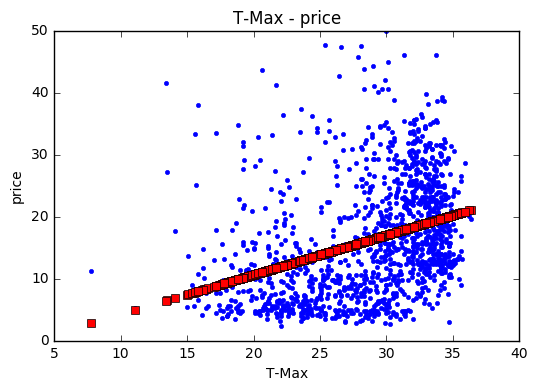

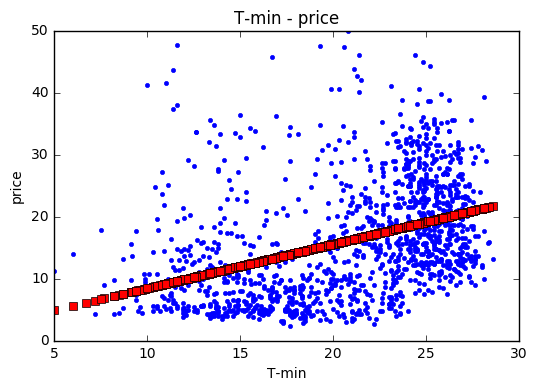

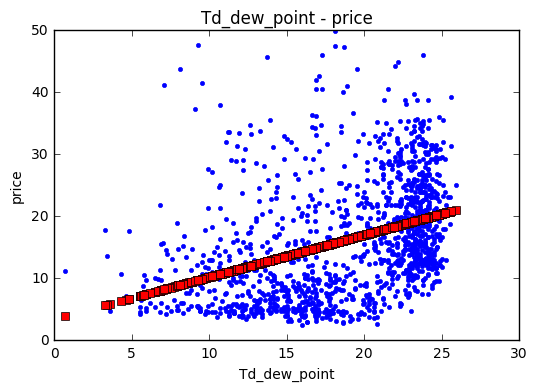

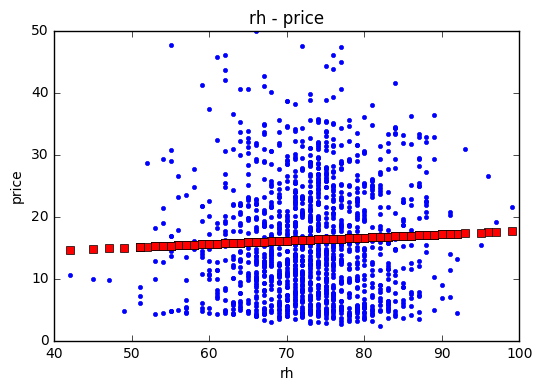

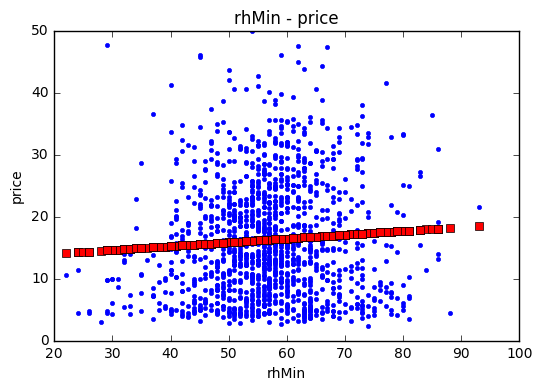

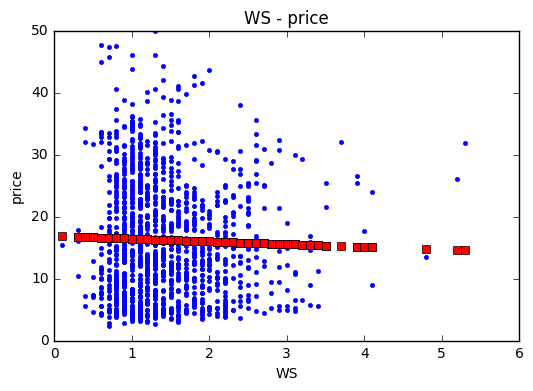

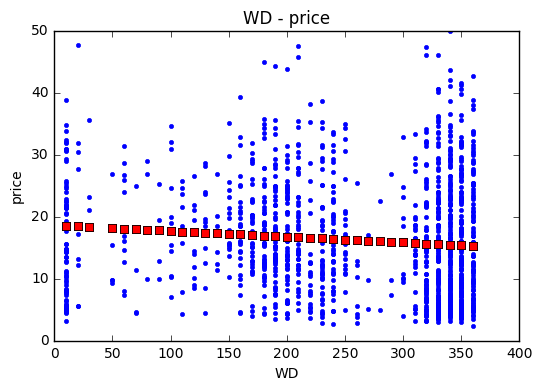

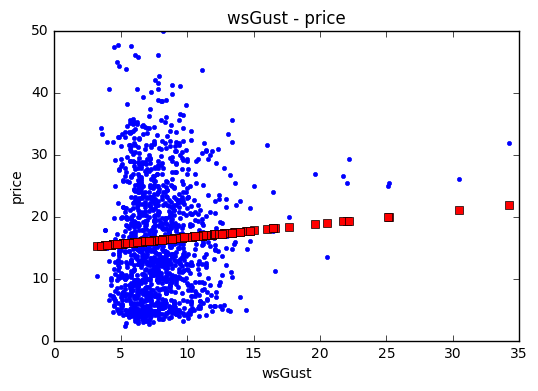

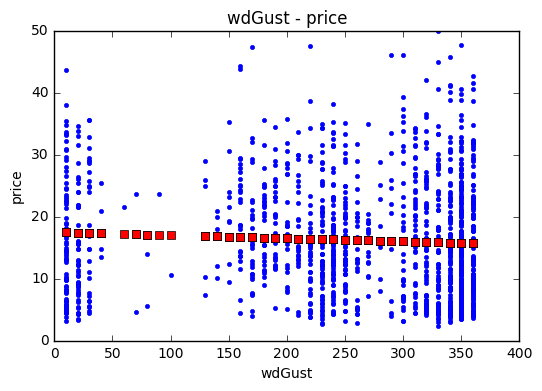

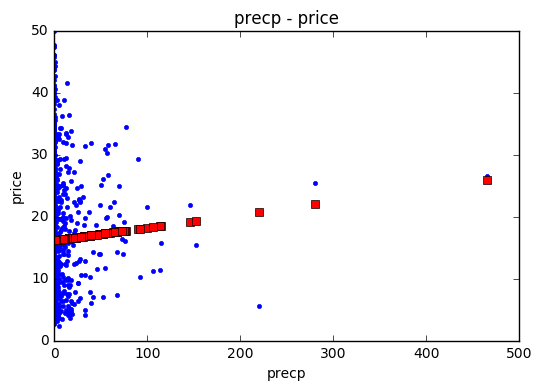

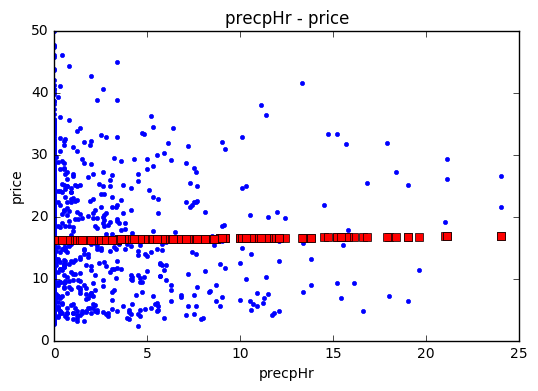

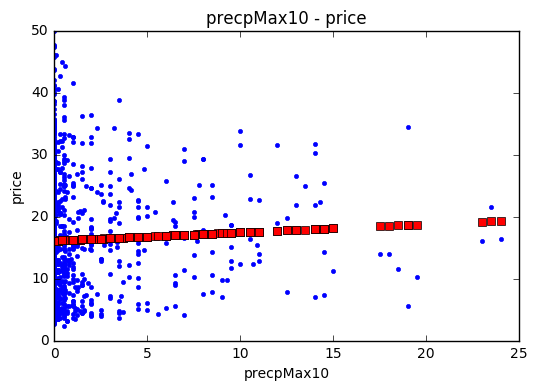

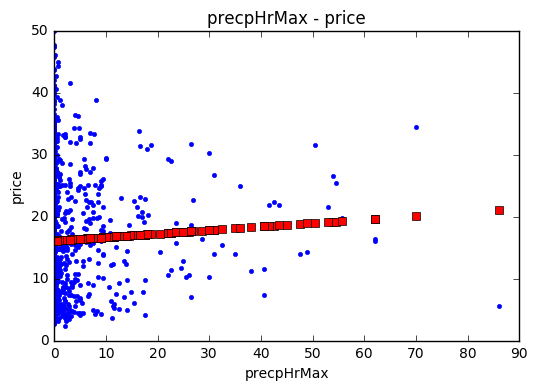

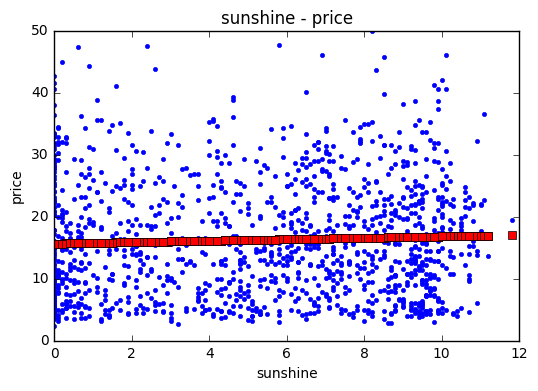

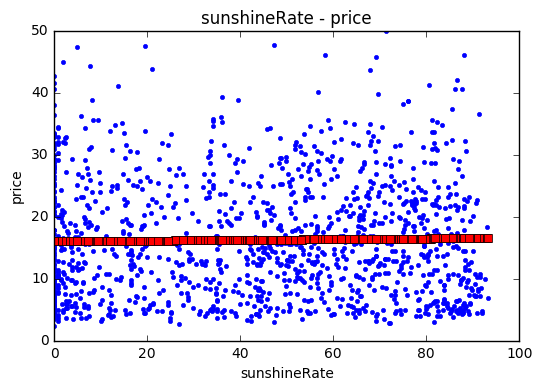

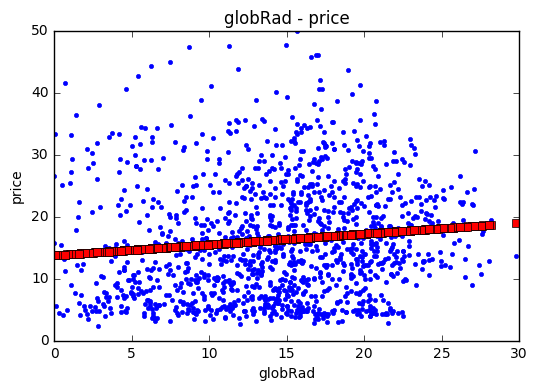

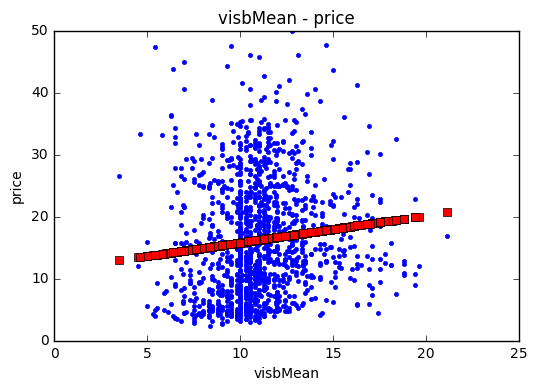

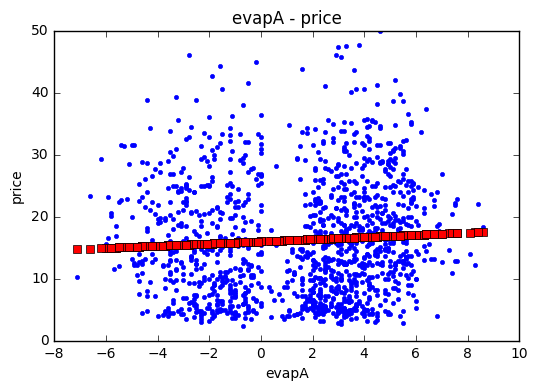

In [55]:
for name in trcol:
    Lreg.fit(Xtrain[name].reshape(-1, 1), ytrain)

    plt.plot(Xtrain[name], ytrain, 'b.')
    plt.plot(Xtrain[name], Lreg.predict(Xtrain[name].reshape(-1, 1)), 'rs')
    plt.title(name + ' - ' + target)
    plt.xlabel(name)
    plt.ylabel(target)
    plt.show()

In [57]:
from scipy import interpolate

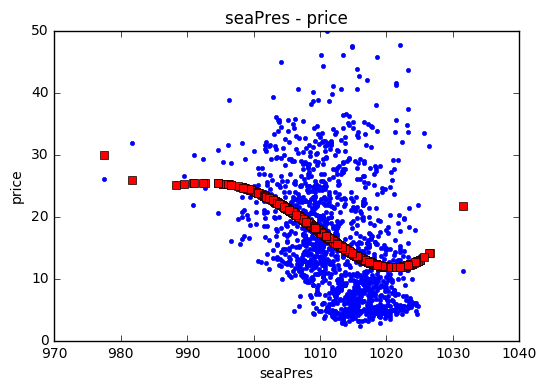

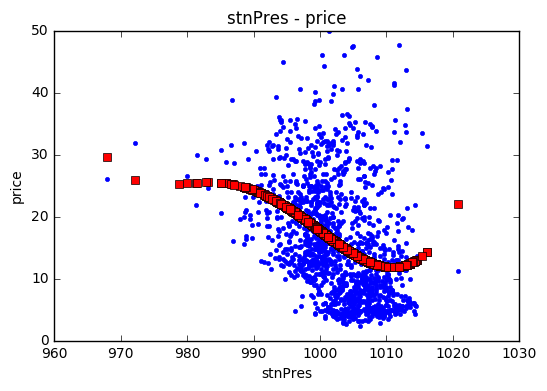

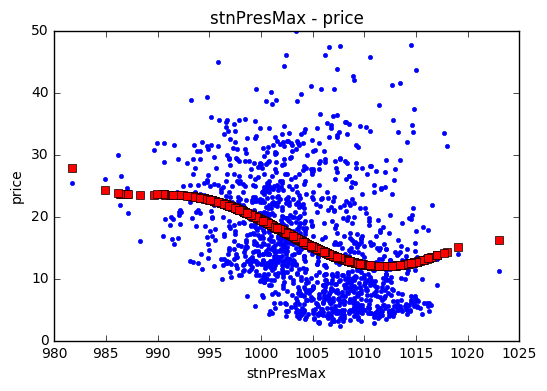

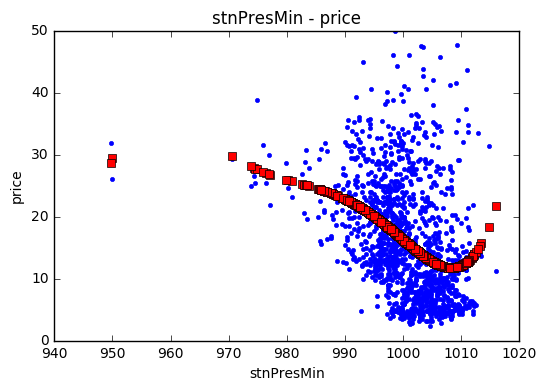

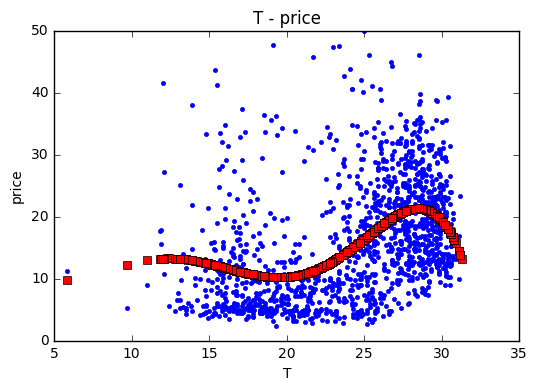

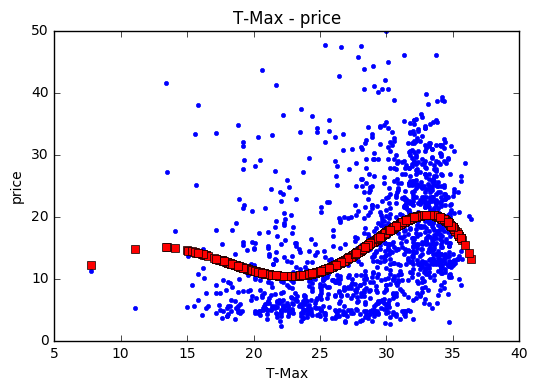

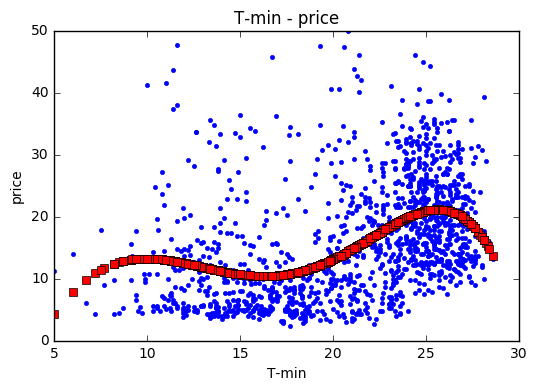

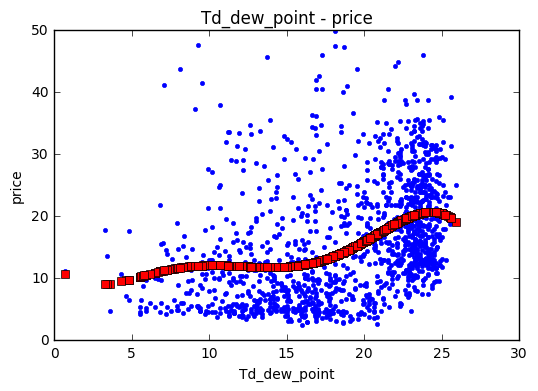

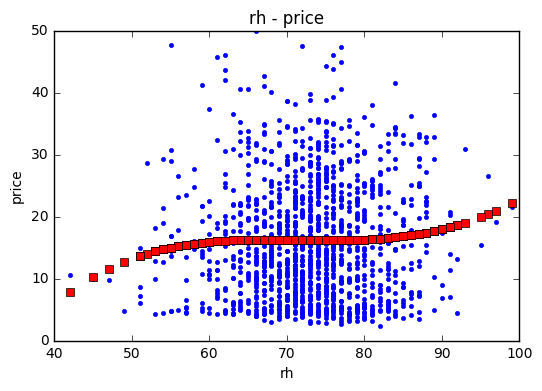

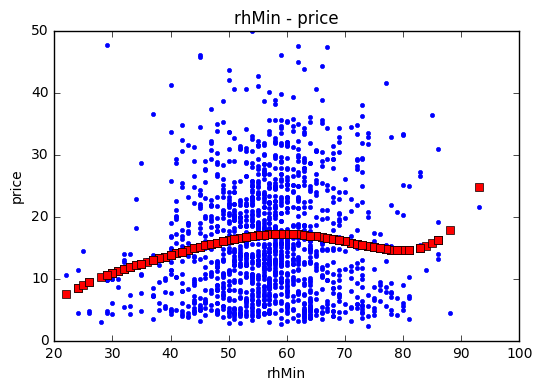

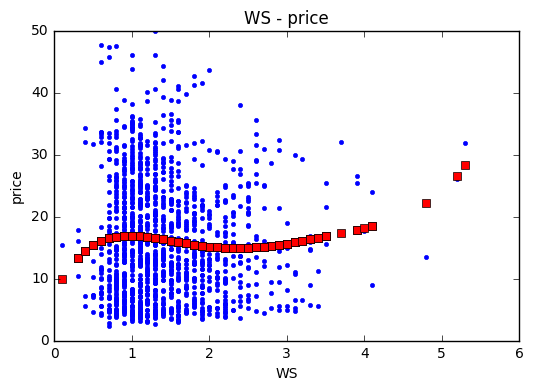

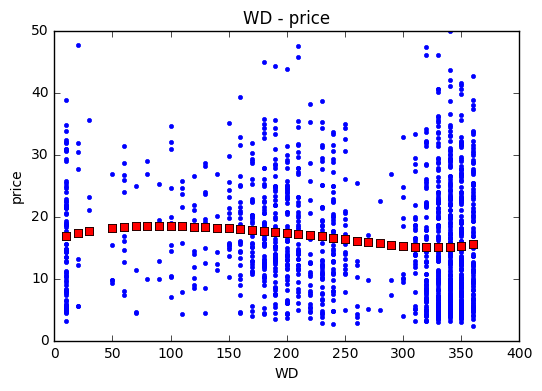

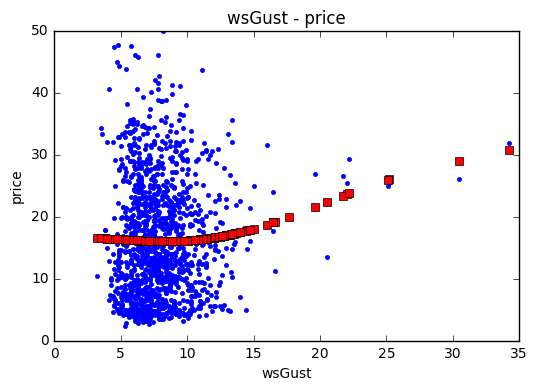

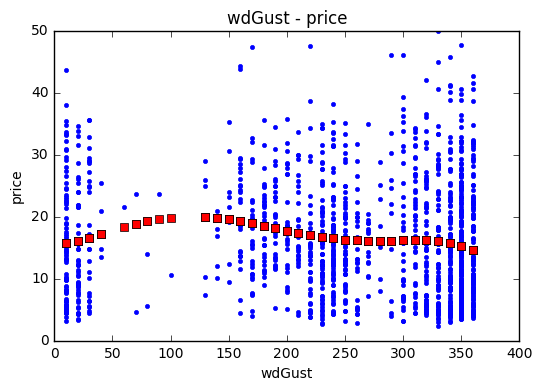

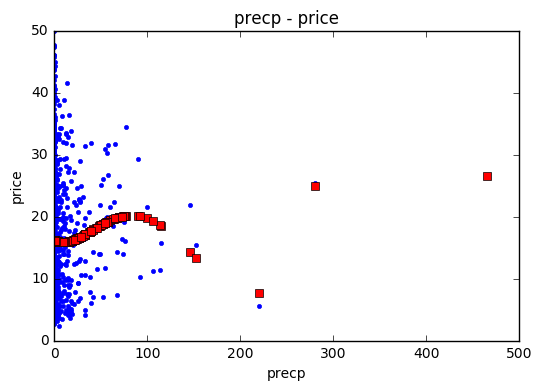

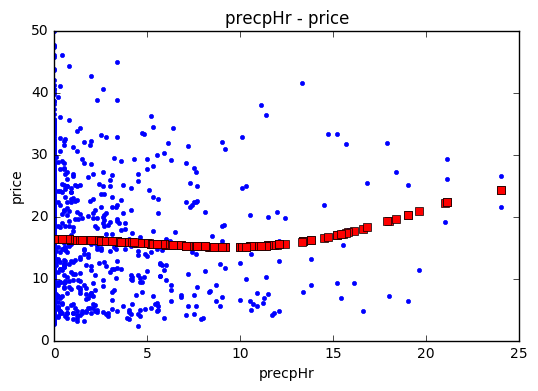

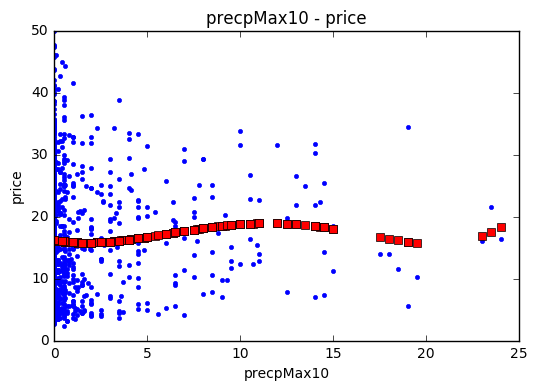

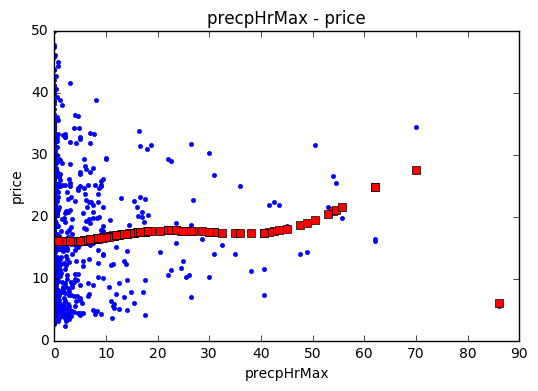

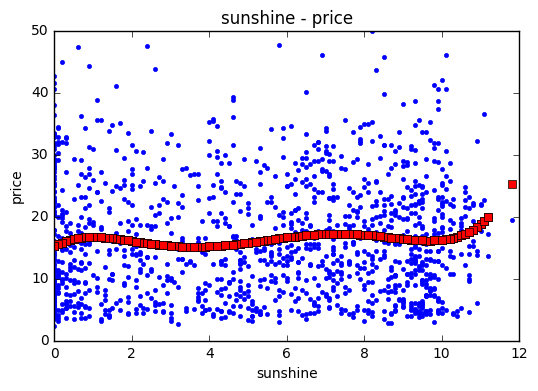

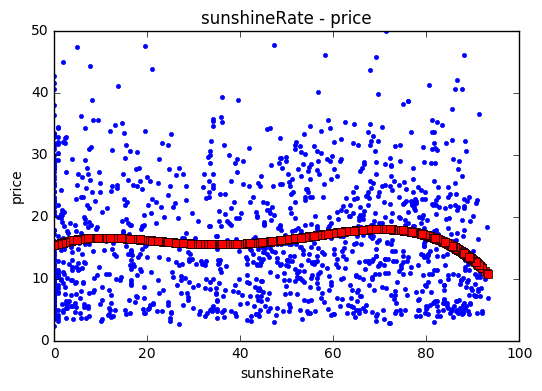

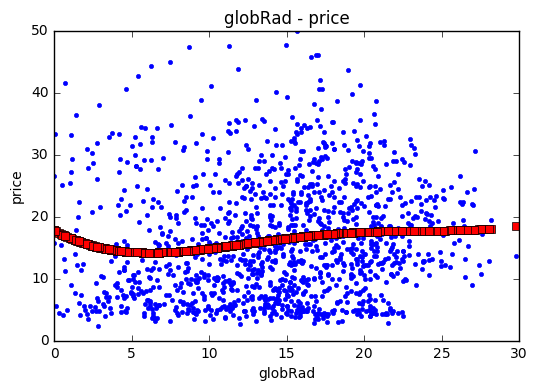

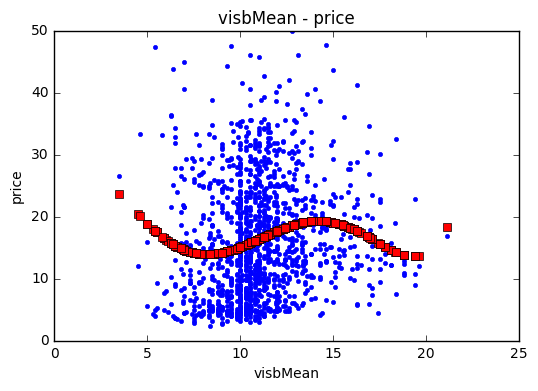

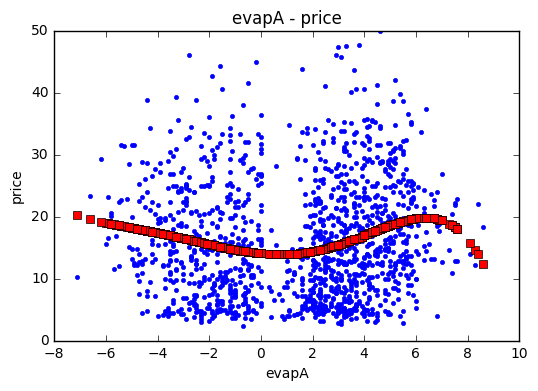

In [60]:
for name in trcol:
    p = np.polyfit(Xtrain[name], ytrain, 5)

    plt.plot(Xtrain[name], ytrain, 'b.')
    plt.plot(Xtrain[name], np.polyval(p, Xtrain[name]), 'rs')
    plt.title(name + ' - ' + target)
    plt.xlabel(name)
    plt.ylabel(target)
    plt.show()

In [52]:
#using PCA to apply dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 69)
pca.fit(Xtrain)

pd.DataFrame(data = pca.components_, columns=trcol+col3+col7).idxmax()

var = np.cumsum(np.round(pca.explained_variance_, decimals = 4)*100)
print np.array(var)
plt.plot(var, ',')

pca = PCA(n_components=8)
pca.fit(Xtrain, ytrain)

Xtrain_pca = pd.DataFrame(data = pca.fit_transform(Xtrain))

Xtest_pca = pd.DataFrame(data = pca.fit_transform(Xtest))

PCA(copy=True, iterated_power='auto', n_components=69, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
Lreg.fit(Xtrain_pca, ytrain)
Lreg.score(Xtest_pca, ytest)

-0.93781415801695944

In [68]:
RFreg.fit(Xtrain_pca, ytrain)
RFreg.score(Xtest_pca, ytest)

-0.74190371375841235